# Economic Characteristics of Immigrants in the U.S.
By Christopher Choi and David McLaughlin  
New York University Stern School of Business  
December 2017  

## Introduction
We analyzed data from the U.S. Census Bureau to understand the demographic and economic attributes of the nation's immigrant population and whether there is evidence that immigrants have any positive or negative impact on the U.S. economy and workers. We found that during the last two decades immigrants have become a larger share of the general population and the labor force. They also make up a disproportionate share of the labor force relative to their share of the wider population. According to state-level data on employment and income, there is no relationship between the number of immigrants in a state and the unemployment rate. The data does indicate, however, a positive relationship between a state's immigrant population and its median household income.


In [5]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

%matplotlib inline

## Part I  
We first examined the growth of the immigrant population in the U.S. Immigrants - both naturalized citizens and non-citizens -- made up about 13 percent of the U.S. population in 2014, the latest year for which data is available. That is up from 9 percent in the mid-1990s. The growth was driven by naturalized citizens. The percentage of non-citizens as a share of the population remained largely flat. From 1995 to 2014, the immigrant population grew far faster than that of native-born Americans. The number of immigrants increased 66 percent, while the native-born population grew 15 percent.

In [6]:
immpopdf = pd.read_excel('/Users/davidmclaughlin/Documents/Data_Bootcamp/immigrantpoptotals.xlsx')

In [7]:
immpopdf['Immigrant Total'] = immpopdf['Naturalized Citizen'] + immpopdf['Not Citizen']
immpopdf['Native Pct'] = (immpopdf['Native']/immpopdf['Total'])*100
immpopdf['Immigrant Pct'] = (immpopdf['Immigrant Total']/immpopdf['Total'])*100
immpopdf['Not Citizen Pct'] = (immpopdf['Not Citizen']/immpopdf['Total'])*100
immpopdf

,Year,Total,Native,Naturalized Citizen,Not Citizen,Immigrant Total,Native Pct,Immigrant Pct,Not Citizen Pct
0,2014,313401,272658,19134,21609,40743,86.999722,13.000278,6.895000
1,2013,311116,271010,18200,21906,40106,87.108988,12.891012,7.041104
2,2012,308827,268851,17934,22042,39976,87.055536,12.944464,7.137329
3,2011,306110,267884,16801,21424,38225,87.512332,12.487341,6.998791
4,2010,304280,266674,16024,21581,37605,87.640989,12.358683,7.092481
5,2009,301483,264733,15475,21274,36749,87.810258,12.189410,7.056451
6,2008,299106,261842,15050,22214,37264,87.541540,12.458460,7.426799
7,2007,296824,259545,14538,22741,37279,87.440706,12.559294,7.661442
8,2006,293834,258175,13884,21775,35659,87.864236,12.135764,7.410647
9,2005,291166,255952,13507,21707,35214,87.905868,12.094132,7.455197


In [8]:
immpopchartdf1 = immpopdf[['Year', 'Immigrant Pct']]
immpopchartdf1 = immpopchartdf1.set_index('Year')
immpopchartdf1 = immpopchartdf1.sort_index(ascending=True, axis=0)

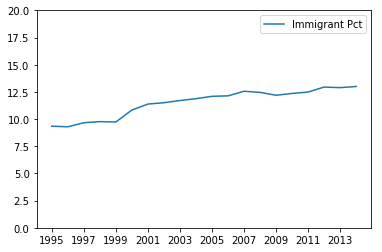

In [9]:
fig, ax = plt.subplots()
immpopchartdf1.plot(ax=ax)
ax.set_ylim([0,20])
ax.set_xlabel('')
plt.xticks(np.arange(1995, 2014, 2.0))
plt.show()

In [10]:
immpopchartdf2 = immpopdf[['Year', 'Not Citizen Pct']]
immpopchartdf2 = immpopchartdf2.set_index('Year')
immpopchartdf2 = immpopchartdf2.sort_index(ascending=True, axis=0)

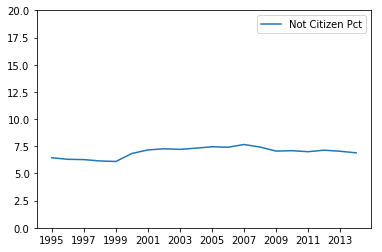

In [11]:
fig, ax = plt.subplots()
immpopchartdf2.plot(ax=ax)
ax.set_ylim([0,20])
ax.set_xlabel('')
plt.xticks(np.arange(1995, 2014, 2.0))
plt.show()

In [12]:
immpopchartdf3 = immpopdf[['Year', 'Naturalized Citizen', 'Not Citizen']]
immpopchartdf3 = immpopchartdf3.set_index('Year')
immpopchartdf3 = immpopchartdf3.sort_index(ascending=True, axis=0)

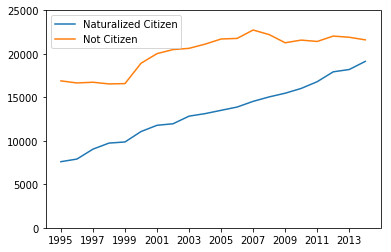

In [13]:
fig, ax = plt.subplots()
immpopchartdf3.plot(ax=ax)
ax.set_ylim([0,25000])
ax.set_xlabel('')
plt.xticks(np.arange(1995, 2014, 2.0))
plt.show()

In [14]:
natimmdf = immpopdf[['Native', 'Immigrant Total']]
natpctchange = (natimmdf.iloc[0]['Native']-natimmdf.iloc[19]['Native'])/natimmdf.iloc[19]['Native']
natpctchange

0.14748289242216367

In [15]:
immpctchange = (natimmdf.iloc[0]['Immigrant Total']-natimmdf.iloc[19]['Immigrant Total'])/natimmdf.iloc[19]['Immigrant Total']
immpctchange

0.6634548646552076

## Part II
### Labor-force characteristics of the foreign-born population
Next we examined various labor-force characteristics of the immigrant population. From 1996 to 2014, immigrants' share of the labor force relative to native-born workers increased from 11 percent to 17 percent. Most immigrant workers in the U.S. were born in Mexico. Our analysis shows that immigrant workers made up a disproportionately large share of the labor force relative to their share of the overall population. They are effectively working harder as a group. The last chart in this section illustrates this trend.

In [16]:
employstatsdf = pd.read_excel('/Users/davidmclaughlin/Documents/Data_Bootcamp/fbemploystatus19962016.xls')

In [17]:
laborforcedf = employstatsdf.loc[['Foreign born pct total']]
laborforcedf = laborforcedf.T
laborforcedf

,Foreign born pct total
1996,0.107605
1997,0.113091
1998,0.116886
1999,0.118514
2000,0.132982
2001,0.138248
2002,0.139987
2003,0.144134
2004,0.145406
2005,0.147616


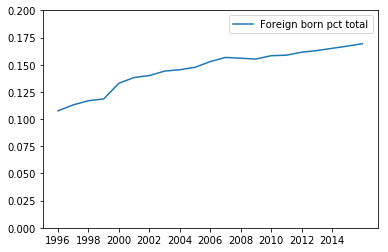

In [18]:
fig, ax = plt.subplots()
laborforcedf.plot(ax=ax)
plt.xticks(np.arange(1996, 2016, 2.0))
ax.set_ylim([0,0.20])
plt.show()

In [19]:
dfemploy14 = pd.read_excel('/Users/davidmclaughlin/Documents/Data_Bootcamp/censusemploy2014.xlsx')

In [20]:
dftotals = dfemploy14.iloc[1][['Asia Total', 'Europe Total', 'Mexico Total', 'Other LatAm Total', 'Other Total']]

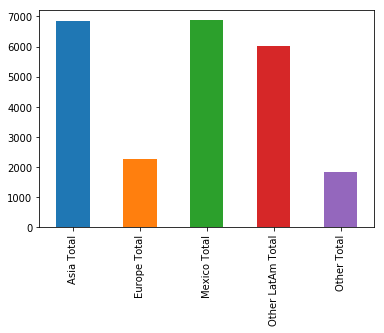

In [21]:
fig, ax = plt.subplots()
dftotals.plot(ax=ax, kind='bar')
plt.show()

In [22]:
immlfdf = pd.read_excel('/Users/davidmclaughlin/Documents/Data_Bootcamp/immlaborforcestats.xlsx')

In [23]:
immlfdf['Foreign Born Share Of Labor Force'] = (immlfdf['Foreign Born Labor Force Level']/(immlfdf['Foreign Born Labor Force Level']+
                                                immlfdf['Native Born Labor Force Level']))*100

In [24]:
immlaborsharedf = immlfdf[['Year', 'Foreign Born Share Of Labor Force']]
immlaborsharedftrim = immlaborsharedf[0:13]
immpctdf = immpopdf[['Year', 'Immigrant Pct']]
immpctdftrim = immpctdf[0:13]
immcombodf = pd.merge(immlaborsharedftrim,
                      immpctdftrim,
                      how='left',
                      on='Year')

In [25]:
immcombodf

,Year,Foreign Born Share Of Labor Force,Immigrant Pct
0,2002,13.998744,11.504811
1,2003,14.413351,11.705889
2,2004,14.540607,11.878729
3,2005,14.761586,12.094132
4,2006,15.286473,12.135764
5,2007,15.669653,12.559294
6,2008,15.596259,12.458460
7,2009,15.522051,12.189410
8,2010,15.826992,12.358683
9,2011,15.877800,12.487341


In [26]:
immcombodf = immcombodf.set_index('Year')

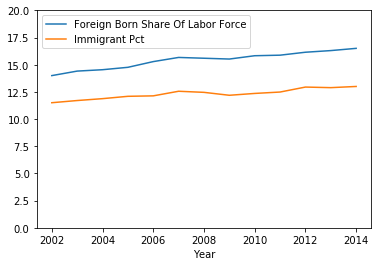

In [27]:
fig, ax = plt.subplots()
immcombodf.plot(ax=ax)
ax.set_ylim(ymin=0, ymax=20)
plt.show()

### Foreign Born Employment by Industry
During the roughly the same period of time, we can also observe a shift in the industries in which foreign born workers are employed. Notably, there is a significant increase in foreign born workers employed in the agriculture sector, with a notable decrease in the finance and real estate, and information industries.

In [28]:
#data source = SELECTED CHARACTERISTICS OF THE NATIVE AND FOREIGN-BORN POPULATIONS  more information 2012-2016 American Community Survey 5-Year Estimates

acsdata2016 = pd.read_csv('https://raw.githubusercontent.com/thischoi/Project_Data/master/ACS_2016_5year_full2.csv')
acsdata2016.columns

#data source = SELECTED CHARACTERISTICS OF THE NATIVE AND FOREIGN-BORN POPULATIONS  more information 2012-2016 American Community Survey 5-Year Estimates

acsdata2005 = pd.read_csv('https://raw.githubusercontent.com/thischoi/Project_Data/master/ACS_2005_us.csv')
acsdata2005.columns

acsfilt2016 = acsdata2016.filter(['Geography',
                          'Total; Estimate; Total population',
                          'Native; Estimate; Total population',
                          'Foreign born; Estimate; Total population',
                          'Foreign born; Naturalized citizen; Estimate; Total population',
                          'Foreign born; Not a U.S. citizen; Estimate; Total population',
                          'Total; Estimate; Civilian employed population 16 years and over',
                          'Native; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Naturalized citizen; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Not a U.S. citizen; Estimate; Civilian employed population 16 years and over',
                          'Total; Estimate; Median Household income (dollars)',
                          'Native; Estimate; Median Household income (dollars)'], axis = 1)

acsfilt2016.columns = ['State',
                   'Total Population',
                   'Native Population',
                   'Foreign Born Population',
                   'Foreign Born Population, Naturalized', 
                   'Foreign Born Population, Not U.S. Citizen', 
                   'Total Population Employed',
                   'Native Population Employed',
                   'Foreign Born Population Employed',
                   'Foreign Born Population, Naturalized, Employed',
                   'Foreign Born Population, Not U.S. Citizen, Employed',
                   'Total - Median Household Income',
                   'Native - Median Household Income']

acsfilt2016['Foreign Born %'] = acsfilt2016['Foreign Born Population']/acsfilt2016['Total Population']
acsfilt2016['Foreign Born Employed %'] = acsfilt2016['Foreign Born Population Employed']/acsfilt2016['Foreign Born Population']
acsfilt2016['Foreign Born Naturalized Employed %'] = acsfilt2016['Foreign Born Population, Naturalized, Employed']/acsfilt2016['Foreign Born Population, Naturalized']
acsfilt2016['Foreign Born Not U.S. Citizen Employed %'] = acsfilt2016['Foreign Born Population, Not U.S. Citizen, Employed']/acsfilt2016['Foreign Born Population, Not U.S. Citizen']
acsfilt2016['Native Employed %'] = acsfilt2016['Native Population Employed']/acsfilt2016['Native Population']

industry2016a = acsdata2016.filter(['Geography',
                               'Foreign born; Estimate; INDUSTRY - Agriculture, forestry, fishing and hunting, and mining',
                               'Foreign born; Estimate; INDUSTRY - Construction',
                               'Foreign born; Estimate; INDUSTRY - Manufacturing',
                               'Foreign born; Estimate; INDUSTRY - Wholesale trade',
                               'Foreign born; Estimate; INDUSTRY - Retail trade',
                               'Foreign born; Estimate; INDUSTRY - Transportation and warehousing, and utilities',
                               'Foreign born; Estimate; INDUSTRY - Information',
                               'Foreign born; Estimate; INDUSTRY - Finance and insurance, and real estate and rental and leasing',
                               'Foreign born; Estimate; INDUSTRY - Professional, scientific, and management, and administrative and waste management services',
                               'Foreign born; Estimate; INDUSTRY - Educational services, and health care and social assistance',
                               'Foreign born; Estimate; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services',
                               'Foreign born; Estimate; INDUSTRY - Other services (except public administration',
                               'Foreign born; Estimate; INDUSTRY - Public administration'])

industry2016a = industry2016a.rename(columns={'Geography':'State',
                               'Foreign born; Estimate; INDUSTRY - Agriculture, forestry, fishing and hunting, and mining':'Agriculture',
                               'Foreign born; Estimate; INDUSTRY - Construction':'Construction',
                               'Foreign born; Estimate; INDUSTRY - Manufacturing':'Manufacturing',
                               'Foreign born; Estimate; INDUSTRY - Wholesale trade':'Wholesale trade',
                               'Foreign born; Estimate; INDUSTRY - Retail trade':'Retail trade',
                               'Foreign born; Estimate; INDUSTRY - Transportation and warehousing, and utilities':'Transportation',
                               'Foreign born; Estimate; INDUSTRY - Information':'Information',
                               'Foreign born; Estimate; INDUSTRY - Finance and insurance, and real estate and rental and leasing':'Finance and real estate',
                               'Foreign born; Estimate; INDUSTRY - Professional, scientific, and management, and administrative and waste management services':'Professional',
                               'Foreign born; Estimate; INDUSTRY - Educational services, and health care and social assistance':'Education and health care',
                               'Foreign born; Estimate; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services':'Arts, entertainment, rec',
                               'Foreign born; Estimate; INDUSTRY - Other services (except public administration':'Other services',
                               'Foreign born; Estimate; INDUSTRY - Public administration':'Public admin'})

acsfilt2005 = acsdata2005.filter(['Geography',
                          'Total; Estimate; Total population',
                          'Native; Estimate; Total population',
                          'Foreign born; Estimate; Total population',
                          'Foreign born; Naturalized citizen; Estimate; Total population',
                          'Foreign born; Not a U.S. citizen; Estimate; Total population',
                          'Total; Estimate; Civilian employed population 16 years and over',
                          'Native; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Naturalized citizen; Estimate; Civilian employed population 16 years and over',
                          'Foreign born; Not a U.S. citizen; Estimate; Civilian employed population 16 years and over',
                          'Total; Estimate; Median Household income (dollars)',
                          'Native; Estimate; Median Household income (dollars)'], axis = 1)

acsfilt2005['Foreign Born %'] = acsfilt2005['Foreign born; Estimate; Total population']/acsfilt2005['Total; Estimate; Total population']
acsfilt2005['Foreign Born Employed %'] = acsfilt2005['Foreign born; Estimate; Civilian employed population 16 years and over']/acsfilt2005['Foreign born; Estimate; Total population']
acsfilt2005['Foreign Born Naturalized Employed %'] = acsfilt2005['Foreign born; Naturalized citizen; Estimate; Civilian employed population 16 years and over']/acsfilt2005['Foreign born; Naturalized citizen; Estimate; Total population']
acsfilt2005['Foreign Born Not U.S. Citizen Employed %'] = acsfilt2005['Foreign born; Not a U.S. citizen; Estimate; Civilian employed population 16 years and over']/acsfilt2005['Foreign born; Not a U.S. citizen; Estimate; Total population']
acsfilt2005['Native Employed %'] = acsfilt2005['Native; Estimate; Civilian employed population 16 years and over']/acsfilt2005['Native; Estimate; Total population']

industry2005a = acsdata2005.filter(['Geography',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Agriculture, forestry, fishing and hunting, and mining',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Construction',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Manufacturing',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Wholesale trade',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Retail trade',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Transportation and warehousing, and utilities',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Information',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Finance and insurance, and real estate and rental and leasing',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Professional, scientific, and management, and administrative and waste management services',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Educational services, and health care and social assistance',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Other services (except public administration',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Public administration'])

industry2005a = industry2005a.rename(columns={'Geography':'State',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Agriculture, forestry, fishing and hunting, and mining':'Agriculture',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Construction':'Construction',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Manufacturing':'Manufacturing',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Wholesale trade':'Wholesale trade',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Retail trade':'Retail trade',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Transportation and warehousing, and utilities':'Transportation',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Information':'Information',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Finance and insurance, and real estate and rental and leasing':'Finance and real estate',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Professional, scientific, and management, and administrative and waste management services':'Professional',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Educational services, and health care and social assistance':'Education and health care',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services':'Arts, entertainment, rec',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Other services (except public administration':'Other services',
                               'Foreign born; Estimate; Civilian employed population 16 years and over - INDUSTRY - Public administration':'Public admin'})

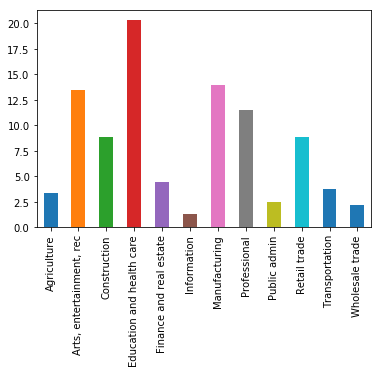

In [29]:
# Comparing the employed populations for foreign born people in various industries in 2005 and 2016 

# 2016 data 
fbindustries2016 = industry2016a.set_index('State')
fbindustries2016.loc['U.S. Average'] = industry2016a.mean()
fbindustriesavg2016 = fbindustries2016.transpose()
fbindustriesavg2016 = fbindustriesavg2016.sort_index(axis=0)
fbindustriesavg2016['U.S. Average'].plot(kind = "bar")

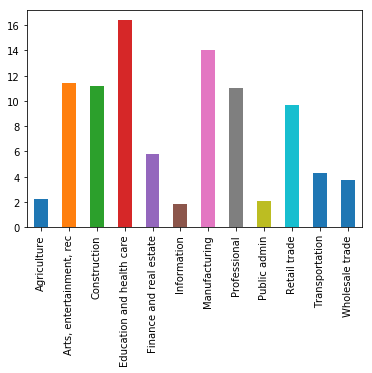

In [30]:
#2005 data
fbindustries2005 = industry2005a.set_index('State')
fbindustriesavg2005 = fbindustries2005.transpose()
fbindustriesavg2005 = fbindustriesavg2005.sort_index(axis=0)
fbindustriesavg2005['United States'].plot(kind = "bar")

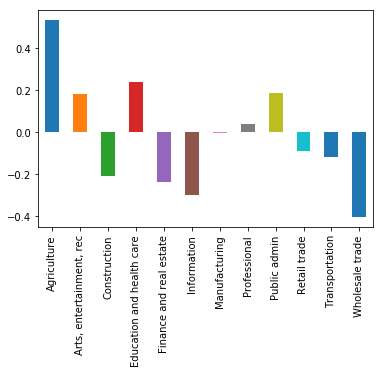

In [31]:
# Merges the two datasets and calculates the percentage change from 2005 to 2016 

fbindustries0516 = pd.concat([fbindustriesavg2005, fbindustriesavg2016], axis=1)
fbindustries0516 = fbindustries0516.filter(['United States','U.S. Average'], axis = 1)
fbindustries0516 = fbindustries0516.rename(columns={'United States':'2005','U.S. Average':'2016'})

fbindustries0516['Percentage Change from 2005 to 2016'] = (fbindustries0516['2016'] - fbindustries0516['2005'])/fbindustries0516['2005']
fbindustries0516['Percentage Change from 2005 to 2016'].plot(kind = "bar")

## Part III
### Foreign born workers and key economic measures
Finally, we examined measures of the foreign born population — the foreign born employment rate, foreign born population as a percentage of total population — against key economic measures such as the unemployment rate. We considered this data by state to see, in particular, if there were any state-specific trends that could potentially be explained by state-level policies. 

Across states, we observed no clear relationship between the foreign born employment rate and the native born employment rate. Similarly, we see no clear relationship between the foreign born employment rate and the foreign born population as a percentage of the total population.

We also plotted foreign born employment rate and the foreign born population, respectively, against the total unemployment rate. We observed no clear trend. We did observe a rough positive relationship between foreign born population and the total median household income, both for states as a whole and for the native born population specifically.

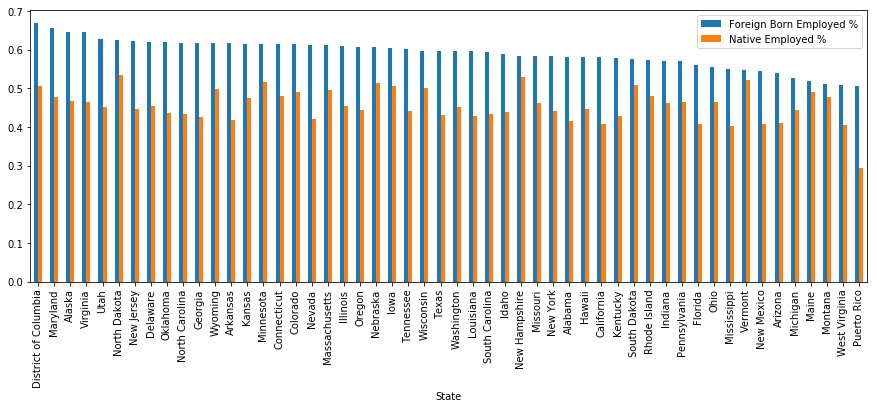

In [32]:
# Plots Foreign Born Employment percentage and Native Born Employment percentage
# ordered by total Foreign Born Employed Percentage

acsfilt2016.sort_values('Foreign Born Employed %', ascending=False).plot(x='State', 
                                              y=['Foreign Born Employed %','Native Employed %'],
                                              kind='bar', 
                                              figsize=(15,5))

# top 5 are DC, MD, AK, VA, UT
# bottom 5 are WV, MT, ME, MI, AZ

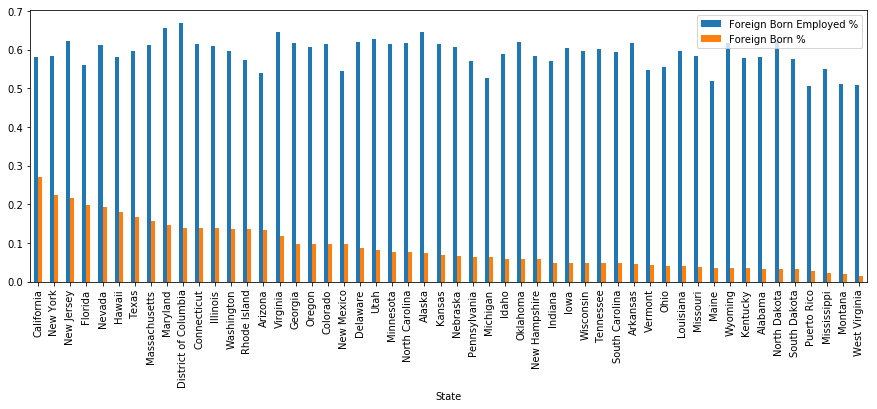

In [33]:
# Plots total Foreign Born Percentage and Foreign born employed ordered by total Foreign Born Percentage, descending

acsfilt2016.sort_values('Foreign Born %', ascending=False).plot(x='State',
                                              y=['Foreign Born Employed %', 'Foreign Born %'],
                                              kind='bar',
                                              figsize=(15,5))

# top 5 are CA, NY, NJ, FL, NV
# bottom 5 are WV, MT, MS, SD, ND

In [34]:
# Unemployment data from BLS
# https://www.bls.gov/lau/lastrk16.htm

unemployment2016 = pd.read_excel('https://github.com/thischoi/Project_Data/blob/master/unemployment.xlsx?raw=true')
unemployment2016['Rate'] = unemployment2016['Rate']/100
unemployment2016 = unemployment2016.rename(index=str, columns={"Rate": "Unemployment Rate"})

# Merging main dataset with unemployment data
newdf2016 = pd.merge(acsfilt2016, unemployment2016, on='State')
fulldf2016 = pd.merge(newdf2016, industry2016a, on='State')
fulldf2016 = fulldf2016.set_index('State')
fulldf2016.columns


Index(['Total Population', 'Native Population', 'Foreign Born Population',
       'Foreign Born Population, Naturalized',
       'Foreign Born Population, Not U.S. Citizen',
       'Total Population Employed', 'Native Population Employed',
       'Foreign Born Population Employed',
       'Foreign Born Population, Naturalized, Employed',
       'Foreign Born Population, Not U.S. Citizen, Employed',
       'Total - Median Household Income', 'Native - Median Household Income',
       'Foreign Born %', 'Foreign Born Employed %',
       'Foreign Born Naturalized Employed %',
       'Foreign Born Not U.S. Citizen Employed %', 'Native Employed %',
       'Unemployment Rate', 'Agriculture', 'Construction', 'Manufacturing',
       'Wholesale trade', 'Retail trade', 'Transportation', 'Information',
       'Finance and real estate', 'Professional', 'Education and health care',
       'Arts, entertainment, rec', 'Public admin'],
      dtype='object')

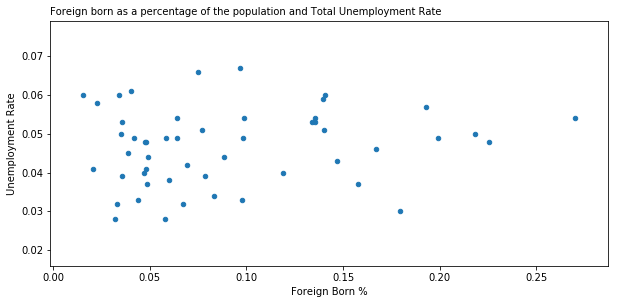

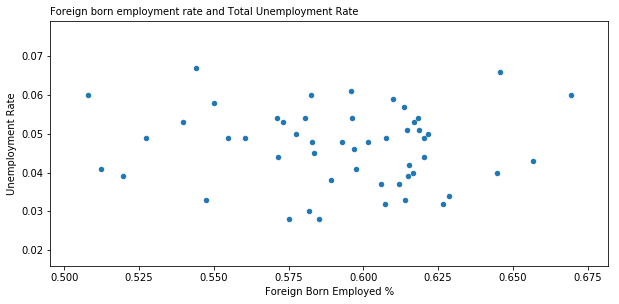

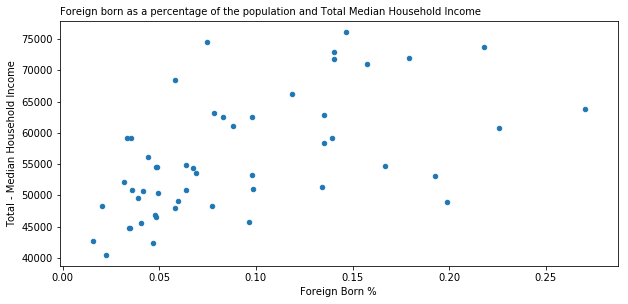

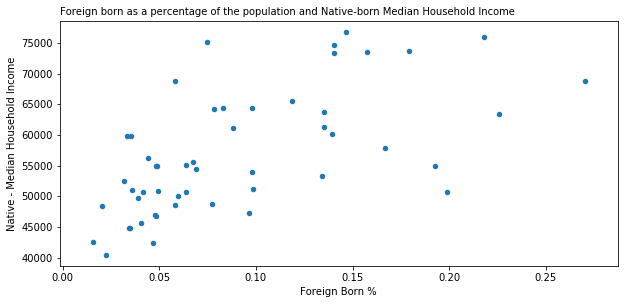

In [35]:
# Plot unemployment and foreign born as a percentage of the population
fig, ax = plt.subplots(figsize = (10, 4.5))
fulldf2016.plot(ax=ax, kind='scatter', x='Foreign Born %', y='Unemployment Rate')
ax.set_xlabel('Foreign Born %')
ax.set_title('Foreign born as a percentage of the population and Total Unemployment Rate', fontsize=10, loc='left')
plt.show()


# Plot unemployment and foreign born employment %
fig, ax = plt.subplots(figsize = (10, 4.5))
fulldf2016.plot(ax=ax, kind='scatter', x='Foreign Born Employed %', y='Unemployment Rate')
ax.set_xlabel('Foreign Born Employed %')
ax.set_title('Foreign born employment rate and Total Unemployment Rate', fontsize=10, loc='left')
plt.show()

# Median Household Income and foreign born as a % of population
fig, ax = plt.subplots(figsize = (10, 4.5))
fulldf2016.plot(ax=ax, kind='scatter', x='Foreign Born %', y='Total - Median Household Income')
ax.set_xlabel('Foreign Born %')
ax.set_title('Foreign born as a percentage of the population and Total Median Household Income', fontsize=10, loc='left')
plt.show()

fig, ax = plt.subplots(figsize = (10, 4.5))
fulldf2016.plot(ax=ax, kind='scatter', x='Foreign Born %', y='Native - Median Household Income')
ax.set_xlabel('Foreign Born %')
ax.set_title('Foreign born as a percentage of the population and Native-born Median Household Income', fontsize=10, loc='left')
plt.show()

### A closer look at foreign born workers and unemployment
While we observed no clear trend across all states, between metrics of the foreign born population — the foreign born employment rate and the total foreign born population — and unemployment, we were curious to see if the extreme cases — the states with the highest and lowest foreign born employment and foreign born people — would demonstrate a more extreme relationship. 

While the states with the highest foreign born populations tended to cluster around similar unemployment rates, states with low foreign born populations ranged several percentage points with no clear trend. States with high foreign born employment rates and states with low foreign born employment rates also varied widely in terms of overall unemployment. 

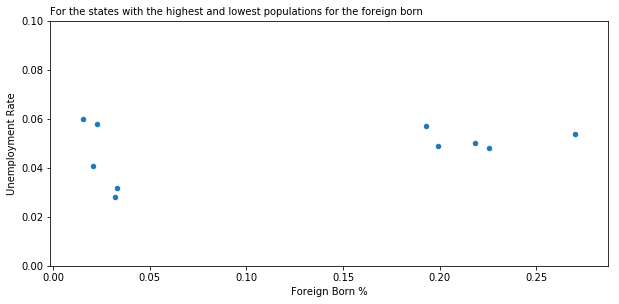

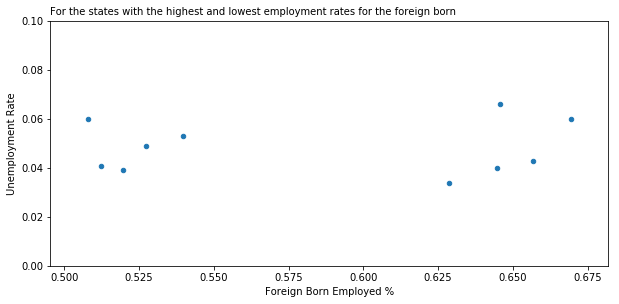

In [36]:
# Define the states where foreign born employment rate is highest and lowest
statesfbep = ['District of Columbia', 'Maryland', 'Alaska', 'Virginia', 'Utah',
              'West Virginia', 'Montana', 'Maine', 'Michigan', 'Arizona']

#Grab DataFrame rows where column has these values
statesfbepdf = acsfilt2016[acsfilt2016.State.isin(statesfbep)]

# Define the states where foreign born population is highest and lowest
statesfbp = ['California', 'New York', 'New Jersey', 'Florida', 'Nevada',
             'West Virginia', 'Montana', 'Mississippi', 'South Dakota', 'North Dakota']

#Grab DataFrame rows where column has these values
statesfbpdf = acsfilt2016[acsfilt2016.State.isin(statesfbp)]

filtdf2 = pd.merge(statesfbepdf, unemployment2016, on='State')
filtdf2 = filtdf2.set_index('State')
filtdf1 = pd.merge(statesfbpdf, unemployment2016, on='State')
filtdf1 = filtdf1.set_index('State')

# Plot unemployment and foreign born as a percentage of the population
# Filtered for the states with the highest and lowest employment rates for the foreign born

fig, ax = plt.subplots(figsize = (10, 4.5))
filtdf1.plot(ax=ax, kind='scatter', x='Foreign Born %', y='Unemployment Rate')
ax.set_ylim([0,.1])
ax.set_xlabel('Foreign Born %')
ax.set_title('For the states with the highest and lowest populations for the foreign born', fontsize=10, loc='left')
plt.show()

# Plot unemployment and foreign born employment %
# Filtered for the states with the highest and lowest employment rates for the foreign born

fig, ax = plt.subplots(figsize = (10, 4.5))
filtdf2.plot(ax=ax, kind='scatter', x='Foreign Born Employed %', y='Unemployment Rate')
ax.set_ylim([0,.1])
ax.set_xlabel('Foreign Born Employed %')
ax.set_title('For the states with the highest and lowest employment rates for the foreign born', fontsize=10, loc='left')
plt.show()